# ●k-nearest neighbor  MingHsun

主要概念:由鄰近判斷自身類別，屬於監督式分類，可用在分類與回歸。

最重要的k值-例如K=5，5個距離最短的向量距離，然後分別看他們的分類為何，來決定目標的分類。

k值的選擇：KNN算法中的k值大小是由算法實現者自行決定的。k選得過大的時候，鄰近中可能包含太多的其它類別的點。而k選取過小容易使得算法分類效果不好。


如何判斷距離是另一個考慮的項目:


Step1 計算算距離：給定測試對象，計算目標與訓練集中的每個對象的距離
Step2 鄰居：在給定距離最近的k個訓練對象，作為測試對象的近鄰
Step3 分類：根據這k個近鄰歸屬的主要類別，來對測試對象分類


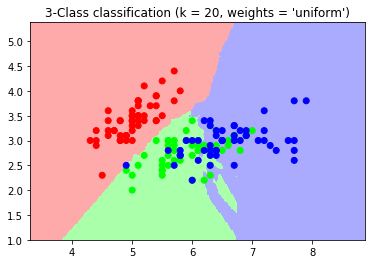

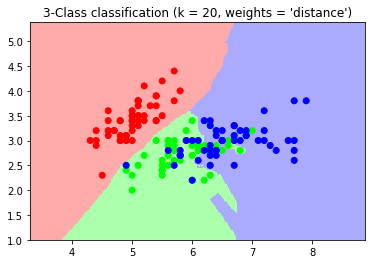

In [29]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 20

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()